In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import utils.ticker_manipulation as tm
import utils.correlations as cor
import csv
import time
import random
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [10]:
ticker_list = ['KO', 'MDB', 'BAC', 'BLK', 'SYK', 'MRK', 'AAL', 'PINS', 'LOW', 'DAL', 'SHW', 'LLY', 'ASML', 'UNH', 'PSX', 'CRM', 'HSY', 'AFRM', 'CHTR', 'PCAR', 'DECK', 'SPGI', 'RHHBY', 'SHOP', 'WFC', 'CVX', 'ABBV', 'BMY', 'AEP', 'PYPL', 'JNJ', 'AXP', 'NVS', 'YUM', 'MSCI', 'ECL', 'MDLZ', 'HCA', 'SBUX', 'UAL', 'CHD', 'KMI', 'XOM', 'CVS', 'GILD', 'HLT', 'QSR', 'LHX', 'GOOGL', 'SLB', 'DDOG', 'VWAGY', 'EQNR', 'AMD', 'VALE', 'COST', 'AMAT', 'GE', 'WMT', 'NVDA', 'NOW', 'TCEHY', 'D', 'COP', 'JD', 'ELV', 'IQV', 'CBOE', 'RIO', 'SAP', 'SCHW', 'LYV', 'TDOC', 'NEE', 'SO', 'ROST', 'MKC', 'STLD', 'CRWD', 'MS', 'DVN', 'PCG', 'HON', 'APD', 'GS', 'REGN', 'KHC', 'INFY', 'BIDU', 'SRE', 'TTE', 'CSCO', 'NET', 'CMCSA', 'ADDYY', 'MAR', 'NFLX', 'SNOW', 'CZR', 'APA', 'GM', 'SNAP', 'NDAQ', 'META', 'NUE', 'EW', 'VLO', 'VRTX', 'HES', 'AZN', 'MSFT', 'BA', 'ADBE', 'SPOT', 'V', 'BHP', 'CCL', 'BSX', 'NTES', 'BKNG', 'TSLA', 'LMT', 'ZS', 'K', 'F', 'TJX', 'SKX', 'T', 'SEDG', 'BEP', 'SPWR', 'DOW', 'NOC', 'IBM', 'UL', 'BYD', 'LCID', 'TM', 'ETN', 'LVMUY', 'MCD', 'WYNN', 'CLX', 'C', 'PENN', 'DUK', 'FI', 'BABA', 'WBD', 'AMGN', 'ENPH', 'ADSK', 'EL', 'AVGO', 'RCL', 'MA', 'DG', 'SHEL', 'LIN', 'X', 'QCOM', 'TMO', 'PEG', 'MPC', 'OXY', 'EMR', 'DD', 'FCX', 'HD', 'CL', 'RTX', 'PPG', 'GPN', 'MDT', 'INTU', 'GD', 'FANG', 'ETSY', 'AAPL', 'WMB', 'PM', 'ROKU', 'INTC', 'ZBH', 'TSM', 'CAT', 'PFE', 'LRCX', 'VZ', 'RIVN', 'MGM', 'ACN', 'DOV', 'HRL', 'CMI', 'MU', 'KLAC', 'PARA', 'DPZ', 'KMB', 'PLTR', 'DE', 'ICE', 'BP', 'AMZN', 'DLTR', 'AA', 'PG', 'FSLR', 'ABNB', 'OKTA', 'GIS', 'TDG', 'EIX', 'UBER', 'DOCU', 'EXC', 'DIS', 'UAA', 'TGT', 'WIT', 'ISRG', 'ED', 'HAL', 'PEP', 'WDAY', 'RUN', 'EPAM', 'BKR', 'LYFT', 'TMUS', 'PDD', 'NKE', 'ORCL', 'NEM', 'JPM', 'LULU', 'PANW', 'MO', 'EOG', 'FTNT', 'MRNA', 'IR', 'CME', 'ULTA', 'LYB', 'EQIX']

test_tickers=['KO', 'MDB', 'BAC', 'BLK', 'SYK', 'MRK', 'AAL']

In [11]:
#Config

#list dates to map for
start_date = "2020-01-01"
end_date = "2025-06-12"
#end_date=dt.now().strftime("%Y-%m-%d")

# --- EWMA Configuration ---
# 'span' determines the decay. A smaller span means faster decay and more weight to recent data.
# Common values: 20 (approx. 1 month), 60 (approx. 3 months).
ewma_span = 720 # You can adjust this value based on how much you want to prioritize recent data

In [12]:
all_dict=tm.get_tickers_data(test_tickers,start_date,end_date)

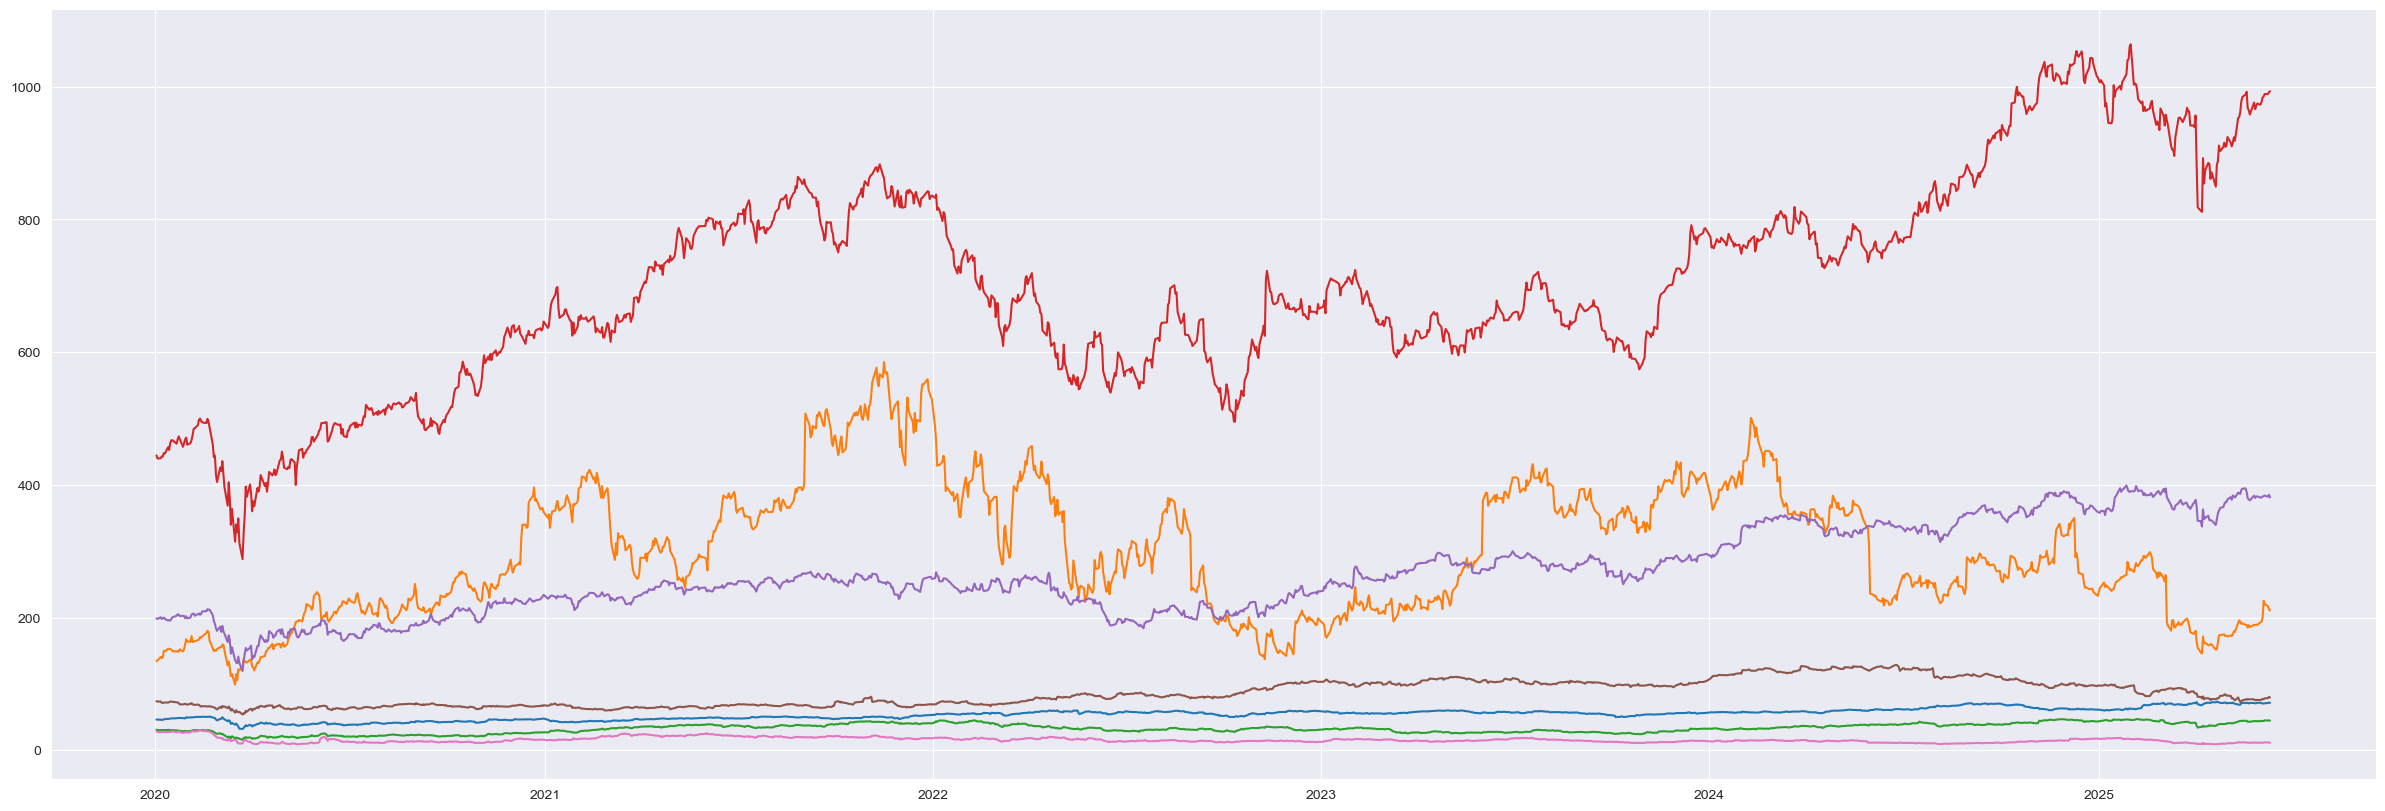

In [13]:
tm.plot_tickers_values(all_dict)

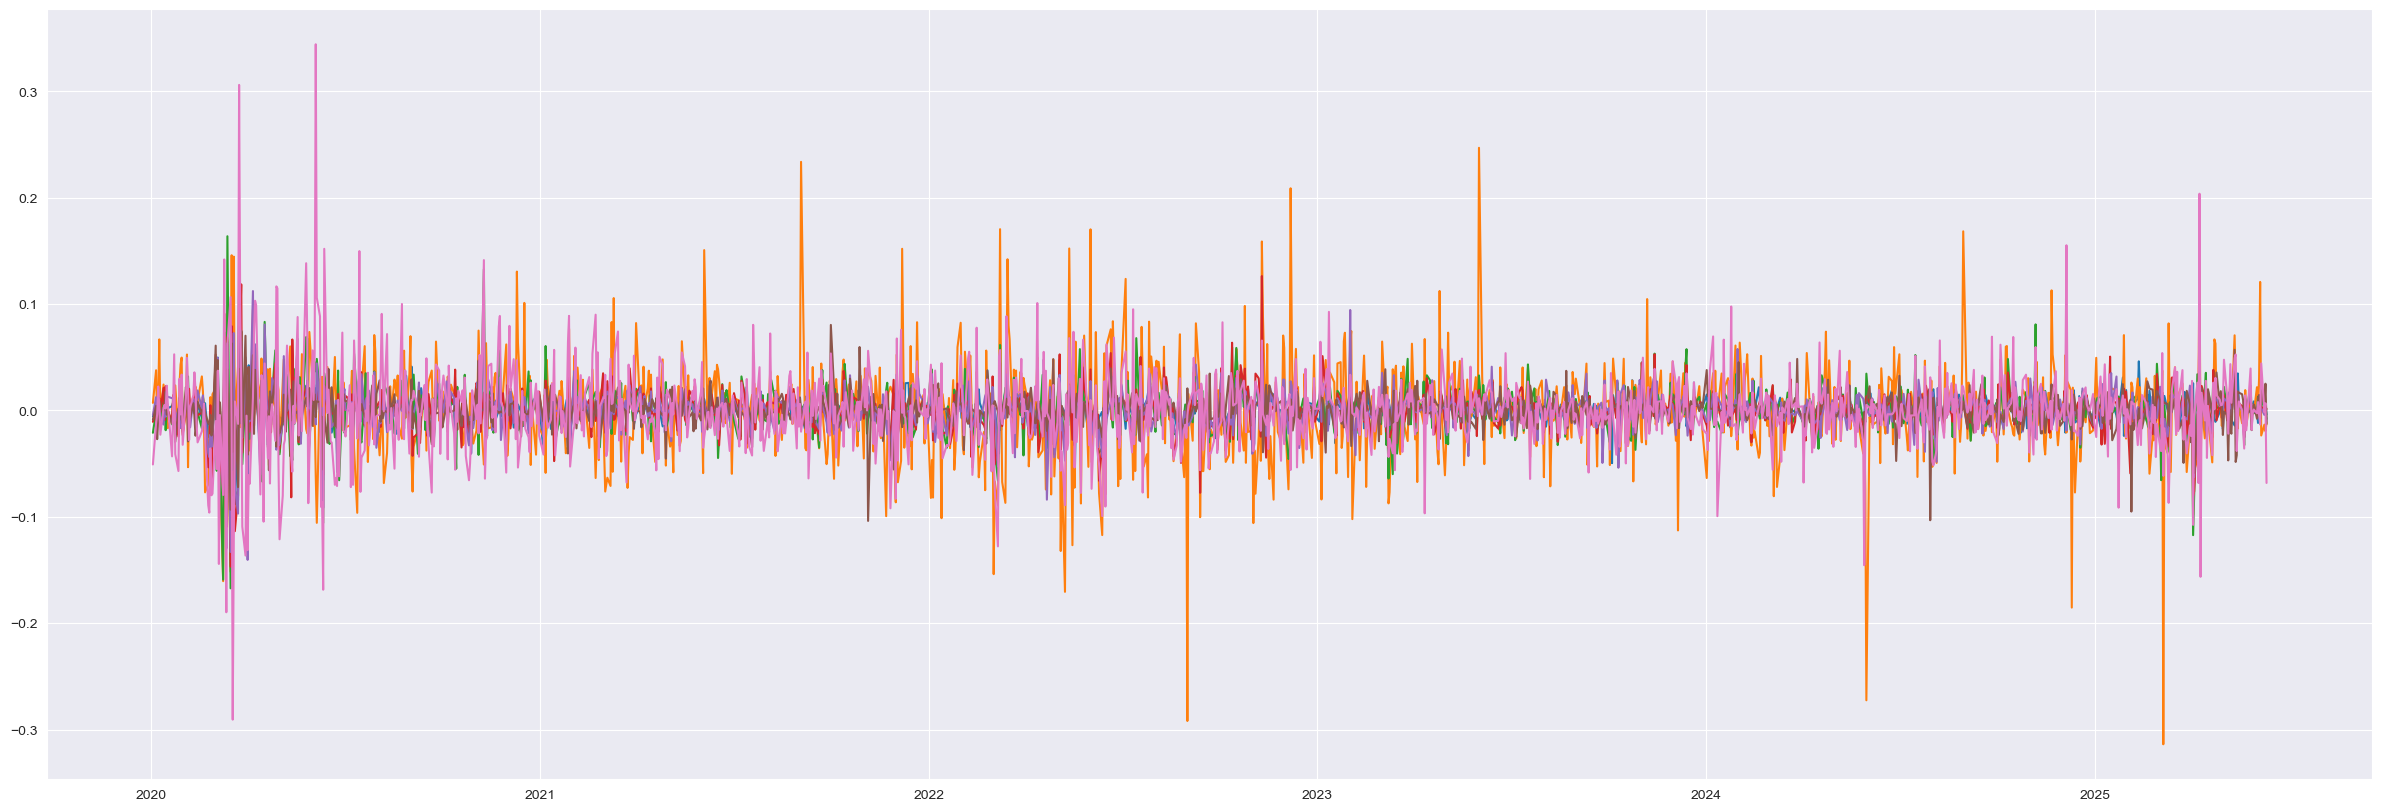

In [14]:
df_returns=tm.plot_tickers_return(all_dict)

# Exploring Correlation Methods

### Pearson Correlation
Linear correlation that measures the strength and direction of a linear relationship between two variables.
**Use in stocks:** Not ideal on its own; it gives equal weight to all data points, so it doesn’t capture recent dynamics or handle outliers well.

---
### Spearman Correlation
Rank-based correlation that assesses how well the relationship between two variables can be described using a monotonic function.
**Use in stocks:** More robust to outliers and useful for capturing consistent directional relationships, even if not linear.

---
### Kendall Tau Correlation
Another rank-based method that compares the number of concordant and discordant pairs.
**Use in stocks:** More stable than Spearman with small sample sizes, but computationally heavier; good for robustness testing.

---
### EWMA Correlation
Exponentially Weighted Moving Average correlation that gives more weight to recent data points.
**Use in stocks:** Very useful for tracking changing relationships over time, especially in volatile markets.

---
### Rolling Window Correlation
Computes correlation over a sliding window of time, capturing localized relationships.
**Use in stocks:** Good for observing short-term changes in correlation, particularly useful in backtesting strategies.

---
### Partial Correlation
Measures the relationship between two variables while controlling for the effect of one or more additional variables.
**Use in stocks:** Useful when trying to isolate the effect of a single asset or factor, filtering out confounding influences.

---
### Distance Correlation
Measures both linear and nonlinear associations between variables.
**Use in stocks:** Captures relationships missed by Pearson/Spearman; great for identifying hidden dependencies in complex datasets.

---
### Mutual Information
An information-theoretic measure that quantifies how much knowing one variable reduces uncertainty about another.
**Use in stocks:** Detects both linear and nonlinear relationships; useful in feature selection for ML models and detecting complex dependencies.

---
### Copula-Based Correlation
Models dependency structures between variables, especially in the tails of their distributions.
**Use in stocks:** Valuable for modeling joint extreme events (e.g., market crashes), often used in risk management and stress testing.

---


In [19]:
# --- Calculate Exponentially Weighted Moving Average (EWMA) Correlation Matrix ---
# This gives more weight to recent values.
# The `span` parameter determines the decay rate.
# .corr() on the EWM object computes the EWMA correlation matrix.
# We then take the last complete correlation matrix from the multi-indexed result.
ewma_corr_df = df_returns.ewm(span=ewma_span).corr()

# Get the most recent EWMA correlation matrix
# df_returns.index[-1] gets the last date in your returns DataFrame.
correlation_matrix = ewma_corr_df.xs(df_returns.index[-1], level=0)

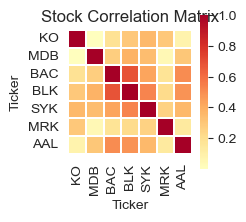

In [20]:
cor.map_correlations(correlation_matrix)